In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import line_search

#### define the objective and gradient

In [98]:
def f(x):
    '''
    the objective fn:
    f(x,y) = (y - x^2)^2 + delta(1 - x)^2
    '''
    return (
        (x[1] - x[0]**2)**2 + 0.01*(1 - x[0])**2
    )

def grad(x):
    '''
    
    '''
    return (
        np.array(
            [ 
               -2*0.01*(1 - x[0])
               , 2*(x[1] - x[0]**2)
            ]
        )
    )


def hessian(x_hess):
    return (
        np.array(
            [
                [-4*x_hess[1] + 12*x_hess[0]**2 + 0.2
                , -4*x_hess[0]], [-4*x_hess[0], 2]
            ]
        )
    )
    

#### stepsize method 

In [50]:
def amrijo(alpha, pk, x0, c, k):
    alpha *= 2
    while f(x0 + alpha*pk) > f(x0) + c*alpha*np.dot(grad(x0), pk):
        alpha /= 2
    return alpha

def exact_line_search(alpha, pk, x0, c, k):
    return np.dot(pk, -grad(x0)) / np.dot(pk, pk)
    #return np.dot(pk, grad(x0)) / np.dot(pk, grad(x0))

def steepest_descent_c(alpha, pk, x0, c, k):
    return c / np.sqrt(k + 1)

#### define steepest descent methods

In [135]:
def steepest_descent(
    x0
    , stepsize_method
    , iterations=5000
    , print_int=1000
    , c=0.1
    , alpha=1
    , tol=1e-5
):
    '''
    
    '''
    errors = []
    
    k = 0
    while True:
        pk = -grad(x0)
        alpha = stepsize_method(alpha, pk, x0, c, k)
        x_new = x0 + alpha*pk
        error = np.abs(f(x_new) - f(np.array([1,1])))
        errors.append(error)
        if np.linalg.norm(grad(x_new)) < tol or k == iterations:
            break
        x0 = x_new
        if k % print_int == 0:
            print(k, x_new)
        k+=1
    return x_new, k, errors


def newtons_method(
    x0
    , stepsize_method
    , iterations=5000
    , print_int=1000
    , c=0.1
    , alpha=1
    , tol=1e-5
):
    '''
    
    '''
    errors = []
    
    k = 0

    while True:
        pk = -np.linalg.inv(hessian(x0)) @ grad(x0)
        alpha = stepsize_method(alpha, pk, x0, c, k)
        x_new = x0 + alpha*pk
        error = np.abs(f(x_new) - f(np.array([1,1])))
        errors.append(error)
        if np.linalg.norm(grad(x_new)) < tol or k == iterations:
            break
        x0 = x_new
        if k % print_int == 0:
            print(k, x_new)
        k+=1
    return x_new, k, errors

def print_results(
    algo
    , _x_
    , iterations=1000
    , print_iter=500
    , method='steepest'
    , label='stepsize'
):
    x_star = np.array([1,1])
    if method=='steepest':
        x_sol,k,errors = steepest_descent(_x_, algo, iterations, print_iter)
    elif method=='newton':
        x_sol,k,errors = newtons_method(_x_, algo, iterations, print_iter)
    print(f'iterations: {k} solution: {x_sol}')
    print(f'error: {np.linalg.norm(x_sol - x_star)}')
    print(label)
    plt.semilogy(range(k+1), errors, label=label)
    plt.legend()
    plt.xlabel('iterations')
    plt.ylabel('error')
    
step_size_map = {
    'amrijo': amrijo
    , 'exact_line_search': exact_line_search
    , 'decreasing': steepest_descent_c
}

x0_1 = np.array([-0.8,0.8])
x0_2 = np.array([0.0,0.0])
x0_3 = np.array([1.5,1.0])

#### run algorithm

0 [-0.764  0.48 ]
iterations: 31 solution: [0.99981489 0.99962608]
error: 0.00041723300748514714
amrijo

0 [-0.764  0.48 ]
1000 [1.         0.86908423]
2000 [1.         0.86908423]
3000 [1.         0.86908423]
4000 [1.         0.86908423]
iterations: 5000 solution: [1.         0.86908423]
error: 0.13091576858155896
exact_line_search

0 [-0.7964  0.768 ]
1000 [-0.59059229  0.36829704]
2000 [-0.50943967  0.27553204]
3000 [-0.44997514  0.21609105]
4000 [-0.40166383  0.17311185]
iterations: 5000 solution: [-0.36043437  0.1401999 ]
error: 1.6093594663790445
decreasing



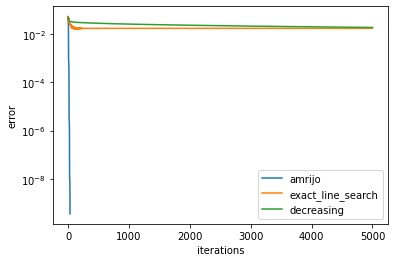

In [136]:
for i in step_size_map:
    print_results(step_size_map[i], x0_1, 5000,1000, label=i)
    print()

0 [-0.764  0.48 ]
iterations: 31 solution: [0.99981489 0.99962608]
error: 0.00041723300748514714


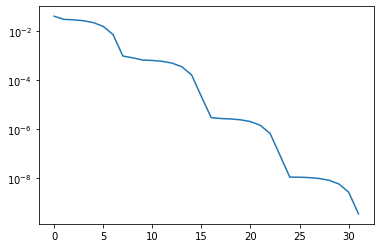

In [9]:
print_results(amrijo, x0_1)

0 [0.04 0.  ]
500 [0.99707456 0.99412584]
iterations: 1000 solution: [0.99707456 0.99412584]
error: 0.006562310254357572


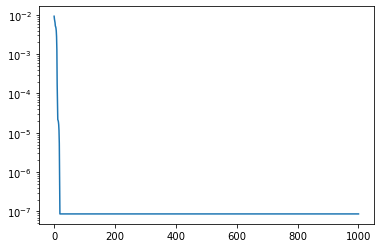

In [10]:
print_results(amrijo, x0_2)

0 [1.495 2.25 ]
iterations: 25 solution: [1.00011506 1.0002325 ]
error: 0.0002594154089952611


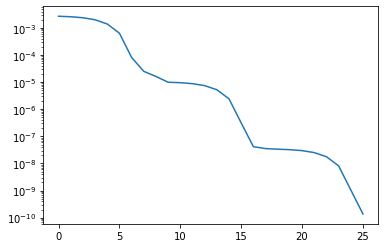

In [11]:
print_results(amrijo, x0_3)

0 [-0.764  0.48 ]
1000 [1.         0.86908423]
iterations: 2000 solution: [1.         0.86908423]
error: 0.13091576858155896


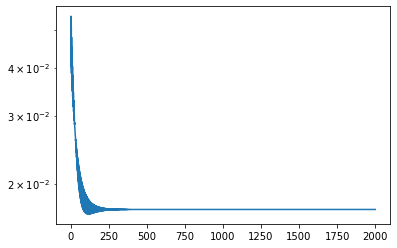

In [51]:
print_results(exact_line_search, x0_1, 2000, 1000)

0 [0.02 0.  ]
iterations: 401 solution: [0.99970291 0.99940198]
error: 0.0006677512415823722


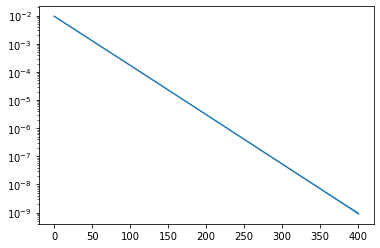

In [47]:
print_results(exact_line_search, x0_2, 2000, 1000)

0 [1.49 3.5 ]
1000 [1.       2.265151]
iterations: 2000 solution: [1.       2.265151]
error: 1.2651509998990216


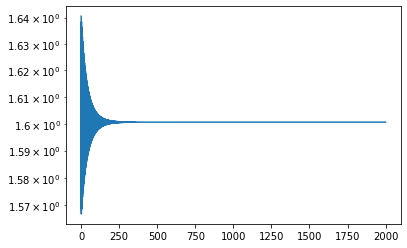

In [48]:
print_results(exact_line_search, x0_3, 2000, 1000)

0 [-0.7964  0.768 ]
10000 [-0.21004529  0.04955518]
20000 [-0.02529438  0.00138027]
30000 [0.09710774 0.0078266 ]
40000 [0.18887246 0.03271342]
iterations: 50000 solution: [0.2619591  0.06482902]
error: 1.191322433103747


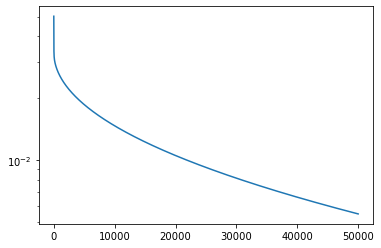

In [22]:
print_results(steepest_descent_c, x0_1, 50000,10000)


0 [0.002 0.   ]
100000 [0.71691952 0.50989019]
200000 [0.83236495 0.69001833]
300000 [0.88785935 0.7862854 ]
400000 [0.9200963  0.84509328]
500000 [0.94072325 0.88383443]
600000 [0.95474751 0.91067041]
700000 [0.96469572 0.92995005]
800000 [0.97197952 0.94419415]
900000 [0.97744603 0.95495549]
iterations: 1000000 solution: [0.98163137 0.96323595]
error: 0.04109746469423802


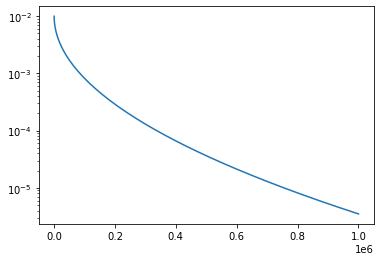

In [119]:
print_results(steepest_descent_c, x0_2, 1e6, 100000)

0 [1.499 1.25 ]
10000 [1.33612369 1.79432257]
20000 [1.28480399 1.65813028]
30000 [1.2508034  1.57085961]
40000 [1.2253132  1.50698027]
iterations: 50000 solution: [1.20501136 1.45705177]
error: 0.5009251219760316


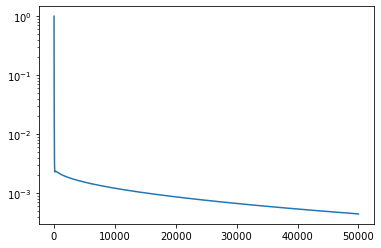

In [120]:
print_results(steepest_descent_c, x0_3, 50000,10000)

0 [-1.11136364  1.25818182]
500 [-0.56378551  0.276269  ]
iterations: 1000 solution: [-0.56378551  0.276269  ]
error: 1.7231400630048652
amrijo

0 [-0.63986571  0.56435713]
500 [-0.17408437  0.17295852]
iterations: 1000 solution: [-0.17408437  0.17295852]
error: 1.4361308188436406
exact_line_search

0 [-0.92454545  0.98327273]
500 [ -74.90580169 5601.95892372]
iterations: 1000 solution: [  -473.38888049 223847.4459592 ]
error: 223846.94863538962
decreasing



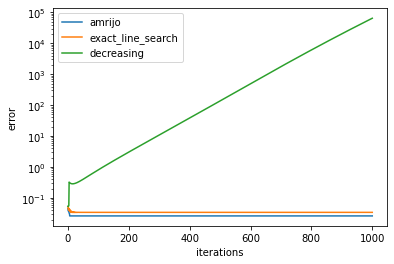

In [137]:
for i in step_size_map:
    print_results(step_size_map[i], x0_1, 1000,500, method='newton', label=i)
    print()

0 [-1.11136364  1.25818182]
500 [-0.56378551  0.276269  ]
iterations: 1000 solution: [-0.56378551  0.276269  ]
error: 1.7231400630048652


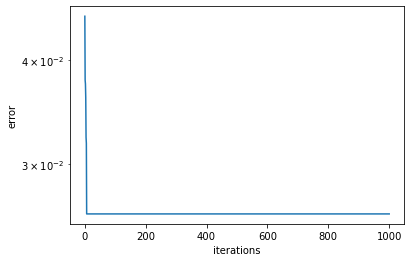

In [122]:
print_results(amrijo, x0_1, 1000,500, method='newton')

0 [-0.63986571  0.56435713]
500 [-0.17408437  0.17295852]
iterations: 1000 solution: [-0.17408437  0.17295852]
error: 1.4361308188436406


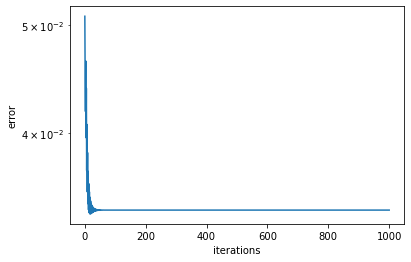

In [123]:
print_results(exact_line_search, x0_1, 1000,500, method='newton')

0 [-0.92454545  0.98327273]
500 [ -74.90580169 5601.95892372]
iterations: 1000 solution: [  -473.38888049 223847.4459592 ]
error: 223846.94863538962


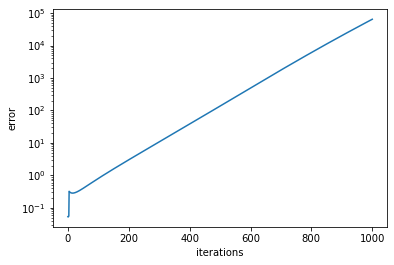

In [124]:
print_results(steepest_descent_c, x0_1, 1000,500, method='newton')

0 [0.2 0. ]
500 [0.8560383  0.72109527]
iterations: 1000 solution: [0.85603833 0.72109531]
error: 0.3138674662751795
amrijo

0 [0.02 0.  ]
500 [0.95910596 0.91988333]
iterations: 1000 solution: [0.99480918 0.9896453 ]
error: 0.011582935512863336
exact_line_search

0 [0.01 0.  ]
500 [0.35242652 0.1241665 ]
iterations: 1000 solution: [0.46212981 0.21354792]
error: 0.9527912741102832
decreasing



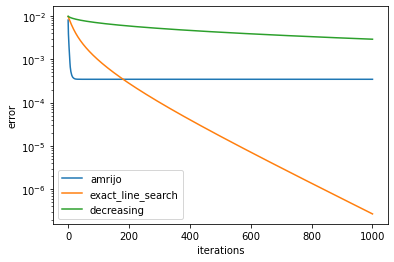

In [138]:
for i in step_size_map:
    print_results(step_size_map[i], x0_2, 1000,500, method='newton', label=i)
    print()

0 [1.86009615 2.39278846]
500 [2.09938382 3.45647998]
iterations: 1000 solution: [2.09938385 3.45648013]
error: 2.691270979917473
amrijo

0 [2.10523325 3.34093555]
500 [ 29.44172187 865.97639842]
iterations: 1000 solution: [  41.09893785 1688.30429629]
error: 1687.7807064639856
exact_line_search

0 [1.64403846 1.55711538]
500 [  84.77667842 7175.60057545]
iterations: 1000 solution: [   536.16715631 287154.98937269]
error: 287154.4880661572
decreasing



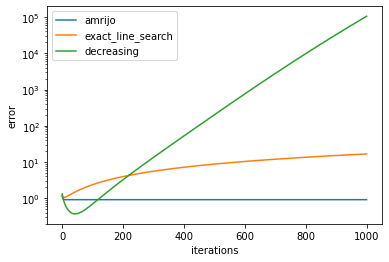

In [139]:
for i in step_size_map:
    print_results(step_size_map[i], x0_3, 1000,500, method='newton', label=i)
    print()